# Extended figure 6

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from scipy.stats import linregress
from PIL import Image
from scipy.stats import mannwhitneyu
import sys

sys.path.append('../..')
from consensus_variables import *

In [24]:
impacts = ["missense", "truncating"]

In [25]:
# paths

save_dir = "figs/"

omega_globalloc_dir = os.path.join(deepcsa_run_dir, "omegagloballoc")
shared_muts_file = "../../data/sharedmutations/bladder_shared_mutations_allpairs_separatedByGenes.tsv"
omega_noshared_muts_dir = "/data/bbg/nobackup/bladder_ts/results/2025-05-27_deepCSA_45_donors_depths/custom_omega/outputs/"

## Load data

In [26]:
# load preprocessed shared mutations: 106097 comparisons
shared_muts_df = pd.read_csv(shared_muts_file, sep = "\t")
shared_muts_df

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,gene
0,24_TR,24,trigone,24_TR,24,trigone,320.0,320.0,116.0,116.0,...,25,92,170,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,ALL_GENES
1,14_DO,14,dome,24_TR,24,trigone,608.0,320.0,218.0,116.0,...,0,6,4,0.008696,0.006024,0.013575,0.000000,0.015666,0.010000,ALL_GENES
2,23_DO,23,dome,24_TR,24,trigone,1198.0,320.0,423.0,116.0,...,1,6,8,0.010652,0.001859,0.020408,0.010638,0.009631,0.013889,ALL_GENES
3,40_TR,40,trigone,24_TR,24,trigone,159.0,320.0,52.0,116.0,...,1,5,8,0.021322,0.005988,0.026667,0.024390,0.023256,0.030888,ALL_GENES
4,02_TR,2,trigone,24_TR,24,trigone,988.0,320.0,426.0,116.0,...,1,2,7,0.006154,0.003704,0.004739,0.008000,0.005714,0.012844,ALL_GENES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106092,13_TR,13,trigone,36_TR,36,trigone,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,TERTpromoter
106093,06_DO,6,dome,36_TR,36,trigone,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,TERTpromoter
106094,41_TR,41,trigone,36_TR,36,trigone,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,TERTpromoter
106095,27_TR,27,trigone,36_TR,36,trigone,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,TERTpromoter


In [27]:
# load omega globalloc

omega_df = pd.DataFrame()

for file in [file_ for file_ in os.listdir(omega_globalloc_dir) if ".tsv" in file_]:
    sample_df = pd.read_csv(f"{omega_globalloc_dir}/{file}", sep = "\t", header = 0)
    sample_df["sample"] = file
    sample_df["modality"] = "globalloc"
    omega_df = pd.concat((omega_df, sample_df)).reset_index(drop = True)

# filter to keep only per sample omega and panel genes, as well as impacts of interest
omega_df_f = omega_df.loc[(omega_df["gene"].isin(panel_all_genes)) &
                        (~omega_df["sample"].str.contains("multi")) & 
                        (omega_df["sample"].str.contains("P19")) &
                        (omega_df["impact"].isin(impacts))]

print(len(omega_df_f["sample"].unique())) # 79 samples

omega_df_f["sample"] = omega_df_f.apply(lambda row: row["sample"].split(".")[1], axis = 1)
omega_df_f["sample"] = omega_df_f["sample"].map(old2new_sample_names)
omega_df_f["donor"] = omega_df_f.apply(lambda row: row["sample"].split("_")[0], axis = 1)
omega_df_f['bladder_loc'] = omega_df_f['sample'].apply(lambda x: 'dome' if 'DO' in x else 'trigone' if 'TR' in x else None)
omega_df_f

79


/tmp/ipykernel_128863/2158478379.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_df_f["sample"] = omega_df_f.apply(lambda row: row["sample"].split(".")[1], axis = 1)
/tmp/ipykernel_128863/2158478379.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_df_f["sample"] = omega_df_f["sample"].map(old2new_sample_names)
/tmp/ipykernel_128863/2158478379.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,modality,donor,bladder_loc
2,CREBBP,36_TR,missense,2,1.275195,0.742182,0.212011,3.961352,globalloc,36,trigone
9,ARID1A,36_TR,missense,1,0.754712,0.768203,0.043454,3.339551,globalloc,36,trigone
11,CDKN1A,36_TR,missense,1,3.483984,0.301423,0.199135,15.422461,globalloc,36,trigone
25,NOTCH2,36_TR,missense,1,0.993848,0.995072,0.057079,4.397778,globalloc,36,trigone
36,RB1,36_TR,missense,1,4.237500,0.243850,0.241707,18.752271,globalloc,36,trigone
...,...,...,...,...,...,...,...,...,...,...,...
124639,KMT2D,15_TR,missense,67,1.931250,0.000003,1.483771,2.475073,globalloc,15,trigone
124643,KMT2D,15_TR,truncating,140,30.887500,0.000000,24.774758,38.291675,globalloc,15,trigone
124652,FOXQ1,15_TR,missense,7,3.226563,0.010212,1.370128,6.350952,globalloc,15,trigone
124654,EP300,15_TR,missense,49,4.687891,0.000000,3.455033,6.214380,globalloc,15,trigone


In [28]:
# load omega global w/o shared mutations

omega_noshared_df = pd.DataFrame()

for file in [file_ for file_ in os.listdir(omega_noshared_muts_dir) if "output_mle" in file_]:

    if "log" not in file and "non_shared" in file:
        print(file)
        sample_df = pd.read_csv(f"{omega_noshared_muts_dir}/{file}", sep = "\t", header = 0)
        sample_df["sample"] = file
        omega_noshared_df = pd.concat((omega_noshared_df, sample_df)).reset_index(drop = True)

# filter to keep only per sample omega and panel genes, as well as impacts of interest
omega_noshared_df_f = omega_noshared_df.loc[(omega_noshared_df["gene"].isin(panel_all_genes)) &
                        (~omega_noshared_df["sample"].str.contains("multi")) & 
                        (omega_noshared_df["sample"].str.contains("P19")) &
                        (omega_df["impact"].isin(impacts))]

print(len(omega_noshared_df_f["sample"].unique())) # 68 samples 

omega_noshared_df_f["sample"] = omega_noshared_df_f.apply(lambda row: row["sample"].split(".")[1], axis = 1)
omega_noshared_df_f["sample"] = omega_noshared_df_f["sample"].map(old2new_sample_names)
omega_noshared_df_f["donor"] = omega_noshared_df_f.apply(lambda row: row["sample"].split("_")[0], axis = 1)
omega_noshared_df_f['bladder_loc'] = omega_noshared_df_f['sample'].apply(lambda x: 'dome' if 'DO' in x else 'trigone' if 'TR' in x else None)
omega_noshared_df_f

output_mle.P19_0001_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0001_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0002_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0002_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0004_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0004_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0005_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0005_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0007_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0007_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0008_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0008_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0009_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0009_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0011_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0011_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0012_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0012_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0013_BDO_01.non_shared.global_l

/tmp/ipykernel_128863/4068075718.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_noshared_df_f["sample"] = omega_noshared_df_f.apply(lambda row: row["sample"].split(".")[1], axis = 1)
/tmp/ipykernel_128863/4068075718.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_noshared_df_f["sample"] = omega_noshared_df_f["sample"].map(old2new_sample_names)
/tmp/ipykernel_128863/4068075718.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,donor,bladder_loc
0,RBM10,01_DO,missense,1,1.496973,0.705764,0.085510,6.617212,01,dome
2,EP300,01_DO,missense,4,1.879688,0.254783,0.582409,4.394946,01,dome
4,KMT2C,01_DO,missense,1,0.731250,0.741907,0.041696,3.234912,01,dome
9,CDKN1A,01_DO,missense,1,3.956641,0.262580,0.225832,17.515601,01,dome
11,ARID1A,01_DO,missense,7,2.721899,0.023765,1.164014,5.303687,01,dome
...,...,...,...,...,...,...,...,...,...,...
1779,TP53,53_TR,missense,5,4.162500,0.010029,1.487098,8.996484,53,trigone
1781,ARID1A,53_TR,missense,21,1.508594,0.082802,0.944426,2.272144,53,trigone
1783,FOXQ1,53_TR,missense,6,4.075000,0.005455,1.608807,8.357837,53,trigone
1785,CREBBP,53_TR,truncating,2,2.128101,0.344188,0.352330,6.655688,53,trigone


## Fig6a: overlapping mutations between dome and trigone per sample

In [29]:
# subset shared mutations for plot
shared_muts_df_A = shared_muts_df.loc[(shared_muts_df["gene"] == "ALL_GENES") &
(shared_muts_df["sample1_donorID"] == shared_muts_df["sample2_donorID"]) &
(shared_muts_df["sample1"] != shared_muts_df["sample2"]) &
(shared_muts_df["sample1_bladder_location"] == "trigone") &
(shared_muts_df["sample2_bladder_location"] == "dome")].reset_index()

# plot SNVs only
shared_muts_df_A = shared_muts_df_A[["sample1_donorID", "sample1", "sample2", "sample1_bladder_location", 
                                    "sample2_bladder_location", 'sample1_numb_muts_allsnvs', 'sample2_numb_muts_allsnvs',
                                    'numb_shared_muts_allsnvs', "jaccard_index_allsnvs"]]


shared_muts_df_A = shared_muts_df_A.rename({"sample1_donorID": "donorID"}, axis = 1)
shared_muts_df_A["donorID"] = shared_muts_df_A["donorID"].astype(str) 

print(len(shared_muts_df_A)) # 68 samples w/ dome-trigone = 34 comparisons
shared_muts_df_A

34


,donorID,sample1,sample2,sample1_bladder_location,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,numb_shared_muts_allsnvs,jaccard_index_allsnvs
0,14,14_TR,14_DO,trigone,dome,423.0,608.0,38,0.038268
1,23,23_TR,23_DO,trigone,dome,1245.0,1198.0,294,0.136808
2,11,11_TR,11_DO,trigone,dome,447.0,550.0,49,0.051688
3,41,41_TR,41_DO,trigone,dome,289.0,438.0,43,0.062865
4,42,42_TR,42_DO,trigone,dome,655.0,942.0,127,0.086395
5,24,24_TR,24_DO,trigone,dome,320.0,270.0,17,0.029668
6,46,46_TR,46_DO,trigone,dome,279.0,599.0,35,0.041518
7,50,50_TR,50_DO,trigone,dome,1063.0,867.0,188,0.107922
8,33,33_TR,33_DO,trigone,dome,146.0,168.0,21,0.071672
9,8,08_TR,08_DO,trigone,dome,1198.0,797.0,54,0.027821


In [30]:
# unique mutations for each dome and trigone of the same donor
shared_muts_df_A["sample1_numb_unique_muts_allsnvs"] = shared_muts_df_A["sample1_numb_muts_allsnvs"] - shared_muts_df_A["numb_shared_muts_allsnvs"] 
shared_muts_df_A["sample2_numb_unique_muts_allsnvs"] = shared_muts_df_A["sample2_numb_muts_allsnvs"] - shared_muts_df_A["numb_shared_muts_allsnvs"] 

# total mutations of donor
shared_muts_df_A["total_muts_allsnvs"] = shared_muts_df_A["sample1_numb_muts_allsnvs"] + shared_muts_df_A["sample2_numb_muts_allsnvs"]

# calculate percentages
shared_muts_df_A["percent_shared_muts_allsnvs"] =  shared_muts_df_A["numb_shared_muts_allsnvs"] * 100 / shared_muts_df_A["total_muts_allsnvs"]
shared_muts_df_A["sample1_percent_shared_muts_allsnvs"] =  shared_muts_df_A["numb_shared_muts_allsnvs"] * 100 / shared_muts_df_A["sample1_numb_muts_allsnvs"]
shared_muts_df_A["sample2_percent_shared_muts_allsnvs"] =  shared_muts_df_A["numb_shared_muts_allsnvs"] * 100 / shared_muts_df_A["sample2_numb_muts_allsnvs"]

# order by total % of shared mutations
shared_muts_df_A = shared_muts_df_A.sort_values(by = "percent_shared_muts_allsnvs", ascending = False).reset_index(drop = True)
shared_muts_df_A

,donorID,sample1,sample2,sample1_bladder_location,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,numb_shared_muts_allsnvs,jaccard_index_allsnvs,sample1_numb_unique_muts_allsnvs,sample2_numb_unique_muts_allsnvs,total_muts_allsnvs,percent_shared_muts_allsnvs,sample1_percent_shared_muts_allsnvs,sample2_percent_shared_muts_allsnvs
0,26,26_TR,26_DO,trigone,dome,685.0,711.0,268,0.237589,417.0,443.0,1396.0,19.197708,39.124088,37.693390
1,29,29_TR,29_DO,trigone,dome,828.0,535.0,214,0.186249,614.0,321.0,1363.0,15.700660,25.845411,40.000000
2,23,23_TR,23_DO,trigone,dome,1245.0,1198.0,294,0.136808,951.0,904.0,2443.0,12.034384,23.614458,24.540902
3,4,04_TR,04_DO,trigone,dome,797.0,843.0,186,0.127923,611.0,657.0,1640.0,11.341463,23.337516,22.064057
4,28,28_TR,28_DO,trigone,dome,701.0,742.0,162,0.126464,539.0,580.0,1443.0,11.226611,23.109843,21.832884
5,5,05_TR,05_DO,trigone,dome,463.0,504.0,106,0.123113,357.0,398.0,967.0,10.961737,22.894168,21.031746
6,52,52_TR,52_DO,trigone,dome,206.0,177.0,39,0.113372,167.0,138.0,383.0,10.182768,18.932039,22.033898
7,50,50_TR,50_DO,trigone,dome,1063.0,867.0,188,0.107922,875.0,679.0,1930.0,9.740933,17.685795,21.683968
8,51,51_TR,51_DO,trigone,dome,895.0,643.0,147,0.105679,748.0,496.0,1538.0,9.557867,16.424581,22.861586
9,15,15_TR,15_DO,trigone,dome,849.0,682.0,122,0.086586,727.0,560.0,1531.0,7.968648,14.369847,17.888563


/tmp/ipykernel_128863/384069306.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


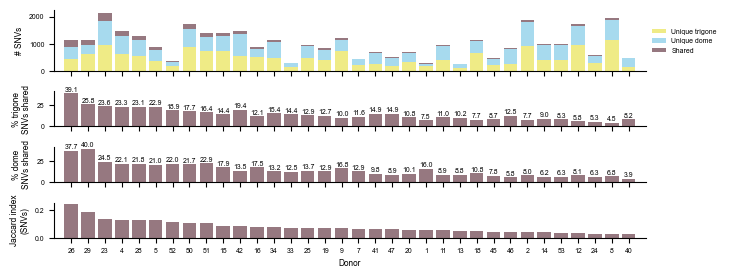

In [54]:
# general plot configuration
fig, axs = plt.subplots(4, 1, figsize = (7.630, 2.962),
                        gridspec_kw = {'height_ratios': [1.75, 1, 1, 1],
                                        'hspace': 0.5},
                        sharex = True)
donors = shared_muts_df_A["donorID"].values
i = 0

# plot 1: trigone unique, dome unique, shared muts (counts)
bottom = np.zeros(len(donors))
levels = ["sample1_numb_unique_muts_allsnvs", "sample2_numb_unique_muts_allsnvs", "numb_shared_muts_allsnvs"]
levels_names = {"Unique trigone": "#EFEB86", "Unique dome": "#A7DAEE", "Shared": "#967880"}

for level, name in zip(levels, levels_names.keys()):
    axs[i].bar(donors, shared_muts_df_A[level], label = name, bottom = bottom, color = levels_names[name])
    bottom += shared_muts_df_A[level]  # Update the bottom position

axs[i].set_ylabel('# SNVs', fontsize = plots_general_config["ylabel_fontsize"])
axs[i].legend(title = '', fontsize = plots_general_config["legend_fontsize"], frameon = False, bbox_to_anchor = (1,0.8))
axs[i].set_xlim(-1, 34)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].tick_params(axis='both', labelsize = plots_general_config["xyticks_fontsize"])

# plot 2: % trigone muts shared with dome
i += 1
bottom = np.zeros(len(donors))
bars = axs[i].bar(donors, shared_muts_df_A["sample1_percent_shared_muts_allsnvs"], bottom = bottom, color = levels_names["Shared"])
for bar, value in zip(bars, shared_muts_df_A["sample1_percent_shared_muts_allsnvs"]):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()+1
    axs[i].text(x, y, f"{value:.1f}", 
                ha = 'center', va = 'bottom',
                fontsize = plots_general_config["annots_fontsize"], 
                fontweight = "normal")

axs[i].set_ylabel('% trigone\nSNVs shared', fontsize = plots_general_config["ylabel_fontsize"])
axs[i].set_xlim(-1, 34)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].tick_params(axis='both', labelsize = plots_general_config["xyticks_fontsize"])

# plot 3: % dome muts shared with trigone
i += 1
bottom = np.zeros(len(donors))
bars = axs[i].bar(donors, shared_muts_df_A["sample2_percent_shared_muts_allsnvs"], bottom = bottom, color = levels_names["Shared"])
for bar, value in zip(bars, shared_muts_df_A["sample2_percent_shared_muts_allsnvs"]):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()+1
    axs[i].text(x, y, f"{value:.1f}", 
                ha = 'center', va = 'bottom', 
                fontsize = plots_general_config["annots_fontsize"], 
                fontweight = "normal")

axs[i].set_ylabel('% dome\nSNVs shared', fontsize = plots_general_config["ylabel_fontsize"])
axs[i].set_xlim(-1, 34)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].tick_params(axis='both', labelsize = plots_general_config["xyticks_fontsize"])

# plot 4: jaccard index
i += 1
bottom = np.zeros(len(donors))
bars = axs[i].bar(donors, shared_muts_df_A["jaccard_index_allsnvs"], bottom = bottom, color = levels_names["Shared"])

axs[i].set_ylabel('Jaccard index\n(SNVs)', fontsize = plots_general_config["ylabel_fontsize"])
axs[i].set_xlim(-1, 34)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].set_xlabel('Donor', fontsize = plots_general_config["xlabel_fontsize"])
axs[i].tick_params(axis='both', labelsize = plots_general_config["xyticks_fontsize"])

plt.tight_layout()
plt.savefig(f"{save_dir}/extFig6a.pdf", dpi = 300, bbox_inches = 'tight')
plt.show()


## Fig6b: similarity between dome and trigone: same donor *vs* different donor - Jaccard index of shared mutations

In [32]:
# subset shared mutations for plot
shared_muts_df_B = shared_muts_df.loc[(shared_muts_df["gene"] == "ALL_GENES") &
(shared_muts_df["sample1"] != shared_muts_df["sample2"])]
shared_muts_df_B

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,gene
1,14_DO,14,dome,24_TR,24,trigone,608.0,320.0,218.0,116.0,...,0,6,4,0.008696,0.006024,0.013575,0.000000,0.015666,0.010000,ALL_GENES
2,23_DO,23,dome,24_TR,24,trigone,1198.0,320.0,423.0,116.0,...,1,6,8,0.010652,0.001859,0.020408,0.010638,0.009631,0.013889,ALL_GENES
3,40_TR,40,trigone,24_TR,24,trigone,159.0,320.0,52.0,116.0,...,1,5,8,0.021322,0.005988,0.026667,0.024390,0.023256,0.030888,ALL_GENES
4,02_TR,2,trigone,24_TR,24,trigone,988.0,320.0,426.0,116.0,...,1,2,7,0.006154,0.003704,0.004739,0.008000,0.005714,0.012844,ALL_GENES
5,35_DO,35,dome,24_TR,24,trigone,816.0,320.0,306.0,116.0,...,0,4,6,0.009778,0.004762,0.015625,0.000000,0.009828,0.012579,ALL_GENES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,05_DO,5,dome,36_TR,36,trigone,504.0,31.0,186.0,6.0,...,1,2,2,0.001873,0.000000,0.000000,0.021277,0.007067,0.010811,ALL_GENES
6236,13_TR,13,trigone,36_TR,36,trigone,128.0,31.0,58.0,6.0,...,2,3,4,0.019231,0.000000,0.000000,0.086957,0.054545,0.038095,ALL_GENES
6237,06_DO,6,dome,36_TR,36,trigone,310.0,31.0,116.0,6.0,...,1,2,2,0.002941,0.000000,0.000000,0.038462,0.010638,0.019608,ALL_GENES
6238,41_TR,41,trigone,36_TR,36,trigone,289.0,31.0,113.0,6.0,...,1,5,2,0.006289,0.000000,0.009524,0.032258,0.023923,0.020202,ALL_GENES


In [33]:
# remove duplicated comparisons (3081 comparisons in total)
shared_muts_df_B['samples_pair'] = shared_muts_df_B.apply(lambda row: tuple(sorted([row['sample1'], row['sample2']])), axis = 1)
shared_muts_df_B = shared_muts_df_B.drop_duplicates(subset = 'samples_pair').drop(columns = 'samples_pair')
shared_muts_df_B

/tmp/ipykernel_128863/2890158222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shared_muts_df_B['samples_pair'] = shared_muts_df_B.apply(lambda row: tuple(sorted([row['sample1'], row['sample2']])), axis = 1)


,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,gene
1,14_DO,14,dome,24_TR,24,trigone,608.0,320.0,218.0,116.0,...,0,6,4,0.008696,0.006024,0.013575,0.000000,0.015666,0.010000,ALL_GENES
2,23_DO,23,dome,24_TR,24,trigone,1198.0,320.0,423.0,116.0,...,1,6,8,0.010652,0.001859,0.020408,0.010638,0.009631,0.013889,ALL_GENES
3,40_TR,40,trigone,24_TR,24,trigone,159.0,320.0,52.0,116.0,...,1,5,8,0.021322,0.005988,0.026667,0.024390,0.023256,0.030888,ALL_GENES
4,02_TR,2,trigone,24_TR,24,trigone,988.0,320.0,426.0,116.0,...,1,2,7,0.006154,0.003704,0.004739,0.008000,0.005714,0.012844,ALL_GENES
5,35_DO,35,dome,24_TR,24,trigone,816.0,320.0,306.0,116.0,...,0,4,6,0.009778,0.004762,0.015625,0.000000,0.009828,0.012579,ALL_GENES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,27_TR,27,trigone,06_DO,6,dome,123.0,310.0,42.0,116.0,...,0,2,4,0.006977,0.000000,0.000000,0.000000,0.009132,0.024096,ALL_GENES
6003,36_TR,36,trigone,06_DO,6,dome,31.0,310.0,6.0,116.0,...,1,2,2,0.002941,0.000000,0.000000,0.038462,0.010638,0.019608,ALL_GENES
6081,27_TR,27,trigone,41_TR,41,trigone,123.0,289.0,42.0,113.0,...,1,3,6,0.014778,0.000000,0.000000,0.020000,0.012397,0.037267,ALL_GENES
6082,36_TR,36,trigone,41_TR,41,trigone,31.0,289.0,6.0,113.0,...,1,5,2,0.006289,0.000000,0.009524,0.032258,0.023923,0.020202,ALL_GENES


In [34]:
# annotate if the two samples belong to the same donor
def annot_pair(row):

    # same donor
    if row["sample1_donorID"] == row["sample2_donorID"]:
        return "same_donor"
    # diff donor
    else:
        # same location
        if row["sample1_bladder_location"] == row["sample2_bladder_location"]:
            return f'diff_donor_{row["sample1_bladder_location"]}'
        # diff location
        else:
            return "diff_donor"

shared_muts_df_B["pair"] = shared_muts_df_B.apply(lambda row: annot_pair(row), axis = 1)
shared_muts_df_B

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,gene,pair
1,14_DO,14,dome,24_TR,24,trigone,608.0,320.0,218.0,116.0,...,6,4,0.008696,0.006024,0.013575,0.000000,0.015666,0.010000,ALL_GENES,diff_donor
2,23_DO,23,dome,24_TR,24,trigone,1198.0,320.0,423.0,116.0,...,6,8,0.010652,0.001859,0.020408,0.010638,0.009631,0.013889,ALL_GENES,diff_donor
3,40_TR,40,trigone,24_TR,24,trigone,159.0,320.0,52.0,116.0,...,5,8,0.021322,0.005988,0.026667,0.024390,0.023256,0.030888,ALL_GENES,diff_donor_trigone
4,02_TR,2,trigone,24_TR,24,trigone,988.0,320.0,426.0,116.0,...,2,7,0.006154,0.003704,0.004739,0.008000,0.005714,0.012844,ALL_GENES,diff_donor_trigone
5,35_DO,35,dome,24_TR,24,trigone,816.0,320.0,306.0,116.0,...,4,6,0.009778,0.004762,0.015625,0.000000,0.009828,0.012579,ALL_GENES,diff_donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,27_TR,27,trigone,06_DO,6,dome,123.0,310.0,42.0,116.0,...,2,4,0.006977,0.000000,0.000000,0.000000,0.009132,0.024096,ALL_GENES,diff_donor
6003,36_TR,36,trigone,06_DO,6,dome,31.0,310.0,6.0,116.0,...,2,2,0.002941,0.000000,0.000000,0.038462,0.010638,0.019608,ALL_GENES,diff_donor
6081,27_TR,27,trigone,41_TR,41,trigone,123.0,289.0,42.0,113.0,...,3,6,0.014778,0.000000,0.000000,0.020000,0.012397,0.037267,ALL_GENES,diff_donor_trigone
6082,36_TR,36,trigone,41_TR,41,trigone,31.0,289.0,6.0,113.0,...,5,2,0.006289,0.000000,0.009524,0.032258,0.023923,0.020202,ALL_GENES,diff_donor_trigone


In [35]:
# keep only comparisons that are dome-trigone (remove dome-dome, trigone-trigone)
shared_muts_df_B = shared_muts_df_B.loc[shared_muts_df_B["pair"].isin(["same_donor", "diff_donor"])]

/tmp/ipykernel_128863/3459715118.py:17: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(shared_muts_df_B, x = "pair", y = jacc_idx, order = figb_categs.keys(),
/tmp/ipykernel_128863/3459715118.py:17: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(shared_muts_df_B, x = "pair", y = jacc_idx, order = figb_categs.keys(),
/tmp/ipykernel_128863/3459715118.py:17: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(shared_muts_df_B, x = "pair", y = jacc_idx, order = figb_categs.keys(),
/tmp/ipykernel_128863/3459715118.py:17: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(shared_muts_df_B, x = "pair", y = jacc_idx, order = figb_categs.keys(),


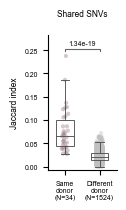

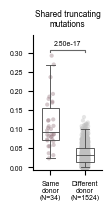

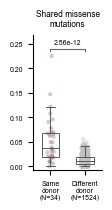

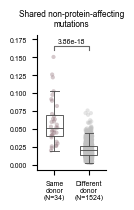

In [61]:
figb_colors = {"same_donor": "#967880", 
            "diff_donor": "#C0C0C0",
            }

jaccard_idxs = ["jaccard_index_allsnvs", "jaccard_index_truncating", "jaccard_index_missense", "jaccard_index_nonprotaffecting"]
id2title = {"allsnvs": "SNVs\n", "truncating": "truncating\nmutations", "missense": "missense\nmutations",
            "nonprotaffecting": "non-protein-affecting\nmutations"}


for jacc_idx in jaccard_idxs:

    fig, axs = plt.subplots(1, 1, figsize = (0.890, 1.759))
    figb_categs = {"same_donor": "Same\ndonor", 
            "diff_donor": "Different\ndonor", # these are only trigone-dome pairs
            }

    sns.stripplot(shared_muts_df_B, x = "pair", y = jacc_idx, order = figb_categs.keys(),
                palette = figb_colors, alpha = 0.4, jitter = 0.1, zorder = 0, size = 3, ax = axs)
    sns.boxplot(shared_muts_df_B, x = "pair", y = jacc_idx, order = figb_categs.keys(),
                showfliers = False, palette = figb_colors, width = 0.5, saturation = 1, linewidth=0.65,
                ax = axs, boxprops = dict(facecolor = 'none'))
    _, pval = mannwhitneyu(shared_muts_df_B.loc[shared_muts_df_B["pair"] == "same_donor"][jacc_idx],
                        shared_muts_df_B.loc[shared_muts_df_B["pair"] == "diff_donor"][jacc_idx])
    
    n_counts = shared_muts_df_B[["pair", jacc_idx]].dropna()["pair"].value_counts(dropna = True).reset_index(name = "count")
    for categ in figb_categs:
        n = n_counts.loc[n_counts["index"] == categ]["count"].values[0]
        figb_categs[categ] = f'{figb_categs[categ]}\n(N={n})'

    h = 0.005
    y = shared_muts_df_B[jacc_idx].max()+h
    axs.plot([0, 0, 1, 1], [y+h, y+2*h, y+2*h, y+h], lw = 0.8, c = "0.4")
    sig_text = format(pval, ".2e")
    axs.text(0.5, y+h+y/20, sig_text, ha='center', va='bottom', fontsize=plots_general_config["annots_fontsize"])  
    
    axs.set_xticklabels(figb_categs.values(), fontsize = plots_general_config["xyticks_fontsize"])
    axs.set_xlabel("")
    if jacc_idx == "jaccard_index_allsnvs":
        axs.set_ylabel("Jaccard index", fontsize = plots_general_config["ylabel_fontsize"])
    else: 
        axs.set_ylabel("")
    axs.set_title(f'Shared {id2title[jacc_idx.split("_")[-1]]}', fontsize = plots_general_config["xylabel_fontsize"])
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.tick_params(axis='y', labelsize = plots_general_config["xyticks_fontsize"])
    axs.tick_params(axis='x', labelsize = plots_general_config["xyticks_fontsize"])
    axs.set_ylim(-0.008, y+y/6)
    plt.savefig(f'{save_dir}/extFig6b_{jacc_idx.split("_")[-1]}.pdf', dpi = 300, bbox_inches = 'tight')

## Fig6c: Similarity between dome and trigone: same donor *vs* different donor - Pearson correlation of omega

In [62]:
# subset shared mutations for plot
shared_muts_df_C = shared_muts_df.loc[(shared_muts_df["gene"] != "ALL_GENES") &
                                    (shared_muts_df["sample1"] != shared_muts_df["sample2"])]
shared_muts_df_C = shared_muts_df_C[["sample1", "sample1_donorID", "sample1_bladder_location",
                "sample2", "sample2_donorID", "sample2_bladder_location", "gene"]].drop_duplicates()
shared_muts_df_C

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,gene
6242,14_DO,14,dome,24_TR,24,trigone,KMT2D
6243,23_DO,23,dome,24_TR,24,trigone,KMT2D
6244,40_TR,40,trigone,24_TR,24,trigone,KMT2D
6245,02_TR,2,trigone,24_TR,24,trigone,KMT2D
6246,35_DO,35,dome,24_TR,24,trigone,KMT2D
...,...,...,...,...,...,...,...
106091,05_DO,5,dome,36_TR,36,trigone,TERTpromoter
106092,13_TR,13,trigone,36_TR,36,trigone,TERTpromoter
106093,06_DO,6,dome,36_TR,36,trigone,TERTpromoter
106094,41_TR,41,trigone,36_TR,36,trigone,TERTpromoter


In [63]:
# remove duplicated comparisons (49296 comparisons in total)
shared_muts_df_C['samples_pair'] = shared_muts_df_C.apply(lambda row: tuple(sorted([row['sample1'], row['sample2'], row["gene"]])),
                                                        axis = 1)
shared_muts_df_C = shared_muts_df_C.drop_duplicates(subset = 'samples_pair').drop(columns = 'samples_pair')
shared_muts_df_C

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,gene
6242,14_DO,14,dome,24_TR,24,trigone,KMT2D
6243,23_DO,23,dome,24_TR,24,trigone,KMT2D
6244,40_TR,40,trigone,24_TR,24,trigone,KMT2D
6245,02_TR,2,trigone,24_TR,24,trigone,KMT2D
6246,35_DO,35,dome,24_TR,24,trigone,KMT2D
...,...,...,...,...,...,...,...
105858,27_TR,27,trigone,06_DO,6,dome,TERTpromoter
105859,36_TR,36,trigone,06_DO,6,dome,TERTpromoter
105937,27_TR,27,trigone,41_TR,41,trigone,TERTpromoter
105938,36_TR,36,trigone,41_TR,41,trigone,TERTpromoter


In [64]:
# merge with omega                                    
shared_muts_df_C = shared_muts_df_C.merge(omega_df_f[["gene", "sample", "impact", "dnds"]], right_on = ["gene", "sample"],
                                        left_on = ["gene","sample1"], how = "left").drop(
    "sample", axis = 1).rename({"dnds": "dnds_sample1"}, axis = 1)
shared_muts_df_C = shared_muts_df_C.merge(omega_df_f[["gene", "sample", "impact", "dnds"]], right_on = ["gene", "sample", "impact"],
                                        left_on = ["gene","sample2", "impact"], how = "left").drop(
    "sample", axis = 1).rename({"dnds": "dnds_sample2"}, axis = 1)

# merge with omega calculated w/o shared mutations 
shared_muts_df_C = shared_muts_df_C.merge(omega_noshared_df_f[["gene", "sample", "impact", "dnds"]],
                                        right_on = ["gene", "sample", "impact"],
                                        left_on = ["gene", "sample1", "impact"], how = "left").drop(
    "sample", axis = 1).rename({"dnds": "dnds_noshared_sample1"}, axis = 1)
shared_muts_df_C = shared_muts_df_C.merge(omega_noshared_df_f[["gene", "sample", "impact", "dnds"]], 
                                        right_on = ["gene", "sample", "impact"],
                                        left_on = ["gene", "sample2", "impact"], how = "left").drop(
    "sample", axis = 1).rename({"dnds": "dnds_noshared_sample2"}, axis = 1)
shared_muts_df_C

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,gene,impact,dnds_sample1,dnds_sample2,dnds_noshared_sample1,dnds_noshared_sample2
0,14_DO,14,dome,24_TR,24,trigone,KMT2D,missense,1.209570,1.320508,1.180078,1.375781
1,14_DO,14,dome,24_TR,24,trigone,KMT2D,truncating,7.029686,4.390649,NaN,NaN
2,23_DO,23,dome,24_TR,24,trigone,KMT2D,missense,2.138281,1.320508,NaN,1.375781
3,23_DO,23,dome,24_TR,24,trigone,KMT2D,truncating,20.814063,4.390649,NaN,NaN
4,40_TR,40,trigone,24_TR,24,trigone,KMT2D,missense,0.955469,1.320508,1.015625,1.375781
...,...,...,...,...,...,...,...,...,...,...,...,...
77648,27_TR,27,trigone,06_DO,6,dome,TERTpromoter,NaN,NaN,NaN,NaN,NaN
77649,36_TR,36,trigone,06_DO,6,dome,TERTpromoter,NaN,NaN,NaN,NaN,NaN
77650,27_TR,27,trigone,41_TR,41,trigone,TERTpromoter,NaN,NaN,NaN,NaN,NaN
77651,36_TR,36,trigone,41_TR,41,trigone,TERTpromoter,NaN,NaN,NaN,NaN,NaN


In [65]:
# annotate if the two samples belong to the same donor
shared_muts_df_C["pair"] = shared_muts_df_C.apply(lambda row: annot_pair(row), axis = 1)

# keep only comparisons that are dome-trigone (remove dome-dome, trigone-trigone)
shared_muts_df_C = shared_muts_df_C.loc[shared_muts_df_C["pair"].isin(["same_donor", "diff_donor"])]
shared_muts_df_C

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,gene,impact,dnds_sample1,dnds_sample2,dnds_noshared_sample1,dnds_noshared_sample2,pair
0,14_DO,14,dome,24_TR,24,trigone,KMT2D,missense,1.209570,1.320508,1.180078,1.375781,diff_donor
1,14_DO,14,dome,24_TR,24,trigone,KMT2D,truncating,7.029686,4.390649,NaN,NaN,diff_donor
2,23_DO,23,dome,24_TR,24,trigone,KMT2D,missense,2.138281,1.320508,NaN,1.375781,diff_donor
3,23_DO,23,dome,24_TR,24,trigone,KMT2D,truncating,20.814063,4.390649,NaN,NaN,diff_donor
8,35_DO,35,dome,24_TR,24,trigone,KMT2D,missense,1.385938,1.320508,NaN,1.375781,diff_donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77642,36_TR,36,trigone,05_DO,5,dome,TERTpromoter,NaN,NaN,NaN,NaN,NaN,diff_donor
77643,06_DO,6,dome,13_TR,13,trigone,TERTpromoter,NaN,NaN,NaN,NaN,NaN,diff_donor
77647,41_TR,41,trigone,06_DO,6,dome,TERTpromoter,NaN,NaN,NaN,NaN,NaN,diff_donor
77648,27_TR,27,trigone,06_DO,6,dome,TERTpromoter,NaN,NaN,NaN,NaN,NaN,diff_donor


In [66]:
# remove genes for which we are not using omega
shared_muts_df_C = shared_muts_df_C.loc[~shared_muts_df_C["gene"].isin(["TERTpromoter", "FGFR3", "PIK3CA"])]
shared_muts_df_C = shared_muts_df_C.loc[(~shared_muts_df_C["gene"].isin(["TP53", "FOXQ1", "RB1"]) &
                                        shared_muts_df_C["impact"] != "truncating")]
shared_muts_df_C

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,gene,impact,dnds_sample1,dnds_sample2,dnds_noshared_sample1,dnds_noshared_sample2,pair
0,14_DO,14,dome,24_TR,24,trigone,KMT2D,missense,1.209570,1.320508,1.180078,1.375781,diff_donor
1,14_DO,14,dome,24_TR,24,trigone,KMT2D,truncating,7.029686,4.390649,NaN,NaN,diff_donor
2,23_DO,23,dome,24_TR,24,trigone,KMT2D,missense,2.138281,1.320508,NaN,1.375781,diff_donor
3,23_DO,23,dome,24_TR,24,trigone,KMT2D,truncating,20.814063,4.390649,NaN,NaN,diff_donor
8,35_DO,35,dome,24_TR,24,trigone,KMT2D,missense,1.385938,1.320508,NaN,1.375781,diff_donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71459,36_TR,36,trigone,05_DO,5,dome,FOXQ1,NaN,NaN,NaN,NaN,NaN,diff_donor
71460,06_DO,6,dome,13_TR,13,trigone,FOXQ1,NaN,NaN,NaN,NaN,NaN,diff_donor
71464,41_TR,41,trigone,06_DO,6,dome,FOXQ1,missense,1.294141,NaN,NaN,NaN,diff_donor
71465,27_TR,27,trigone,06_DO,6,dome,FOXQ1,missense,0.831056,NaN,NaN,NaN,diff_donor


In [67]:
len(shared_muts_df_C[["sample1", "sample2"]].drop_duplicates()) # 1558 comparisons

1558

In [68]:
# calculate omega's correlation between samples, both w/ and w/o shared mutations
def calc_pearson(group, col_x, col_y, min_group_size = 1):
    group = group[[col_x, col_y]].dropna()
    if group.empty:
        return np.nan
    if len(group) < min_group_size:
        return np.nan
    x1 = group[col_x]
    y1 = group[col_y]
    res = linregress(x=x1, y=y1)
    return res.rvalue ** 2

gp_size = 3 # min number of points to calculate a correlation

# for missense omega
corr_miss_df = shared_muts_df_C.loc[shared_muts_df_C["impact"] == "missense"].groupby(
    ["sample1", "sample2", "pair"]
).apply(lambda group: calc_pearson(group, "dnds_sample1", "dnds_sample2", min_group_size = gp_size)).reset_index(name='pearson_corr')
corr_miss_df["pair"] = corr_miss_df["pair"] + "_allmuts"
corr_miss_noshared_df = shared_muts_df_C.loc[shared_muts_df_C["impact"] == "missense"].groupby(
    ["sample1", "sample2", "pair"]
).apply(lambda group: calc_pearson(group, "dnds_noshared_sample1", "dnds_noshared_sample2", min_group_size = gp_size)).reset_index(name='pearson_corr')
corr_miss_noshared_df["pair"] = corr_miss_noshared_df["pair"] + "_noshared"
corr_miss_df = pd.concat([corr_miss_df, corr_miss_noshared_df]).reset_index(drop = True)
display(corr_miss_df)

# for truncating omega
corr_trunc_df = shared_muts_df_C.loc[shared_muts_df_C["impact"] == "truncating"].groupby(
    ["sample1", "sample2", "pair"]
).apply(lambda group: calc_pearson(group, "dnds_sample1", "dnds_sample2", min_group_size = gp_size)).reset_index(name='pearson_corr')
corr_trunc_df["pair"] = corr_trunc_df["pair"] + "_allmuts"
corr_trunc_noshared_df = shared_muts_df_C.loc[shared_muts_df_C["impact"] == "truncating"].groupby(
    ["sample1", "sample2", "pair"]
).apply(lambda group: calc_pearson(group, "dnds_noshared_sample1", "dnds_noshared_sample2", min_group_size = gp_size)).reset_index(name='pearson_corr')
corr_trunc_noshared_df["pair"] = corr_trunc_noshared_df["pair"] + "_noshared"
corr_trunc_df = pd.concat([corr_trunc_df, corr_trunc_noshared_df]).reset_index(drop = True)
corr_trunc_df

,sample1,sample2,pair,pearson_corr
0,01_DO,01_TR,same_donor_allmuts,0.330554
1,01_DO,02_TR,diff_donor_allmuts,0.012836
2,01_DO,04_TR,diff_donor_allmuts,0.531751
3,01_DO,05_TR,diff_donor_allmuts,0.124065
4,01_DO,07_TR,diff_donor_allmuts,0.146884
...,...,...,...,...
3111,53_TR,46_DO,diff_donor_noshared,0.751790
3112,53_TR,47_DO,diff_donor_noshared,0.982960
3113,53_TR,50_DO,diff_donor_noshared,0.435051
3114,53_TR,51_DO,diff_donor_noshared,0.021107


,sample1,sample2,pair,pearson_corr
0,01_DO,01_TR,same_donor_allmuts,0.068803
1,01_DO,02_TR,diff_donor_allmuts,0.000164
2,01_DO,04_TR,diff_donor_allmuts,0.177702
3,01_DO,05_TR,diff_donor_allmuts,0.238212
4,01_DO,07_TR,diff_donor_allmuts,0.954543
...,...,...,...,...
3111,53_TR,46_DO,diff_donor_noshared,NaN
3112,53_TR,47_DO,diff_donor_noshared,NaN
3113,53_TR,50_DO,diff_donor_noshared,NaN
3114,53_TR,51_DO,diff_donor_noshared,NaN


/tmp/ipykernel_128863/2338616217.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(corr_miss_df, x = "pair", y = "pearson_corr", order = figc_categs.keys(),


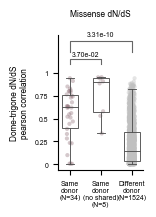

/tmp/ipykernel_128863/2338616217.py:60: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(corr_trunc_df, x = "pair", y = "pearson_corr", order = figc_categs.keys(),


[0.3905596591543884, 1.2475851544860203e-15]


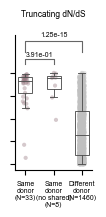

In [ ]:
figc_categs = {"same_donor_allmuts": "Same\ndonor", 
            "same_donor_noshared": "Same\ndonor\n(no shared)",
            "diff_donor_allmuts": "Different\ndonor" # this are only trigone-dome pairs
            }
figc_colors = {"same_donor_allmuts": "#967880", 
            "same_donor_noshared": "#967880",
            "diff_donor_allmuts": "#C0C0C0",
            }

# missense omegas

fig, axs = plt.subplots(1, 1, figsize = (1.2, 1.759))
sns.boxplot(corr_miss_df, x = "pair", y = "pearson_corr", order = figc_categs.keys(), 
            showfliers = False, palette = figc_colors, width = 0.5, saturation = 1, linewidth=0.65,
            ax = axs, boxprops = dict(facecolor = 'none'))
sns.stripplot(corr_miss_df, x = "pair", y = "pearson_corr", order = figc_categs.keys(),
            palette = figc_colors, alpha = 0.4, jitter = 0.1, zorder = 0, size = 3, ax = axs)

pvals = []
_, pval = mannwhitneyu(corr_miss_df.loc[corr_miss_df["pair"] == "same_donor_allmuts"]["pearson_corr"],
                        corr_miss_df.loc[corr_miss_df["pair"] == "same_donor_noshared"]["pearson_corr"], 
                        nan_policy = "omit")
pvals.append(pval)
_, pval = mannwhitneyu(corr_miss_df.loc[corr_miss_df["pair"] == "same_donor_allmuts"]["pearson_corr"],
                        corr_miss_df.loc[corr_miss_df["pair"] == "diff_donor_allmuts"]["pearson_corr"],
                        nan_policy = "omit")
pvals.append(pval)

for i, pval in enumerate(pvals):

    h = 0.05+i/15
    y = corr_miss_df["pearson_corr"].max()+h
    axs.plot([0, 0, i+1, i+1], [y+h, y+2*h, y+2*h, y+h], lw = 0.8, c = "0.4")
    sig_text = format(pval, ".2e")
    axs.text(0.5+i/2, y+h+0.05+i/12+y/50, sig_text, ha='center', va='bottom', fontsize=plots_general_config["annots_fontsize"]) 

n_counts = corr_miss_df[["pair", "pearson_corr"]].dropna()["pair"].value_counts(dropna = True).reset_index(name = "count")
for categ in figc_categs:
    n = n_counts.loc[n_counts["index"] == categ]["count"].values[0]
    figc_categs[categ] = f'{figc_categs[categ]}\n(N={n})'

axs.set_xticklabels(figc_categs.values(), fontsize = plots_general_config["xyticks_fontsize"])
axs.set_yticks([0, 0.25, 0.5, 0.75, 1])
axs.set_yticklabels([0, 0.25, 0.5, 0.75, 1], fontsize = plots_general_config["xyticks_fontsize"])
axs.tick_params(axis='y', labelsize = plots_general_config["xyticks_fontsize"])
axs.set_xlabel("")
axs.set_title("Missense dN/dS\n", fontsize = plots_general_config["xylabel_fontsize"])
axs.set_ylabel("Dome-trigone dN/dS\npearson correlation", fontsize = plots_general_config["ylabel_fontsize"])
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
plt.savefig(f"{save_dir}/extFig6c_missense.pdf", dpi = 300, bbox_inches = 'tight')
plt.show()

# truncating omegas

fig, axs = plt.subplots(1, 1, figsize = (1, 1.759))
sns.boxplot(corr_trunc_df, x = "pair", y = "pearson_corr", order = figc_categs.keys(), 
            showfliers = False, palette = figc_colors, width = 0.5, saturation = 1, linewidth=0.65,
            ax = axs, boxprops = dict(facecolor = 'none'))
sns.stripplot(corr_trunc_df, x = "pair", y = "pearson_corr", order = figc_categs.keys(),
            palette = figc_colors, alpha = 0.4, jitter = 0.1, zorder = 0, size = 3, ax = axs)

pvals = []
_, pval = mannwhitneyu(corr_trunc_df.loc[corr_trunc_df["pair"] == "same_donor_allmuts"]["pearson_corr"],
                        corr_trunc_df.loc[corr_trunc_df["pair"] == "same_donor_noshared"]["pearson_corr"],
                        nan_policy = "omit")
pvals.append(pval)
_, pval = mannwhitneyu(corr_trunc_df.loc[corr_trunc_df["pair"] == "same_donor_allmuts"]["pearson_corr"],
                        corr_trunc_df.loc[corr_trunc_df["pair"] == "diff_donor_allmuts"]["pearson_corr"],
                        nan_policy = "omit")
pvals.append(pval)
print(pvals)

for i, pval in enumerate(pvals):

    h = 0.05+i/15
    y = corr_trunc_df["pearson_corr"].max()+h
    axs.plot([0, 0, i+1, i+1], [y+h, y+2*h, y+2*h, y+h], lw = 0.8, c = "0.4")
    sig_text = format(pval, ".2e")
    axs.text(0.5+i/2, y+h+0.05+i/12+y/50, sig_text, ha='center', va='bottom', fontsize=plots_general_config["annots_fontsize"]) 

figc_categs = {"same_donor_allmuts": "Same\ndonor", 
            "same_donor_noshared": "Same\ndonor\n(no shared)",
            "diff_donor_allmuts": "Different\ndonor" # this are only trigone-dome pairs
            }
n_counts = corr_trunc_df[["pair", "pearson_corr"]].dropna()["pair"].value_counts(dropna = True).reset_index(name = "count")
for categ in figc_categs:
    n = n_counts.loc[n_counts["index"] == categ]["count"].values[0]
    figc_categs[categ] = f'{figc_categs[categ]}\n(N={n})'


axs.set_xticklabels(figc_categs.values(), fontsize = plots_general_config["xyticks_fontsize"])
axs.set_yticks([0, 0.25, 0.5, 0.75, 1])
axs.set_yticklabels([], fontsize = plots_general_config["xyticks_fontsize"])
axs.tick_params(axis='y', labelsize = plots_general_config["xyticks_fontsize"])
axs.set_xlabel("")
axs.set_title("Truncating dN/dS\n", fontsize = plots_general_config["xylabel_fontsize"])
axs.set_ylabel("", fontsize = plots_general_config["ylabel_fontsize"])
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
plt.savefig(f"{save_dir}/extFig6c_truncating.pdf", dpi = 300, bbox_inches = 'tight')

## Final figure

In [45]:
# load images
figA = Image.open(os.path.join(save_dir, "extFig6a.pdf"))
figB1 = Image.open(os.path.join(save_dir, "extFig6b_allsnvs.pdf"))
figB2 = Image.open(os.path.join(save_dir, "extFig6b_truncating.pdf"))
figB3 = Image.open(os.path.join(save_dir, "extFig6b_missense.pdf"))
figB4 = Image.open(os.path.join(save_dir, "extFig6b_nonprotaffecting.pdf"))
figC1 = Image.open(os.path.join(save_dir, "extFig6c_missense.pdf"))
figC2 = Image.open(os.path.join(save_dir, "extFig6c_truncating.pdf"))

# height
# fig_height = figA.height + figB1.height + figC.height 
fig_height = figA.height + figB1.height 

# width
fig_width = figA.width

# create canvas
canvas = Image.new('RGB', (fig_width, fig_height), 'white')
sep_rows = 50

# paste images
canvas.paste(figA, (0, 0))
canvas.paste(figB1, (0, figA.height))
canvas.paste(figB2, (figB1.width, figA.height))
canvas.paste(figB3, (figB1.width+figB2.width, figA.height))
canvas.paste(figB4, (figB1.width+figB2.width+figB3.width, figA.height))

n = 0
canvas.paste(figC1, (n+figB1.width+figB2.width+figB3.width+figB4.width, figA.height))
canvas.paste(figC2, (n+figB1.width+figB2.width+figB3.width+figB4.width+figC1.width, figA.height))

plt.imshow(canvas)
plt.axis('off')
canvas.save(f'{save_dir}/extFig6.pdf')
plt.show()

UnidentifiedImageError: cannot identify image file 'figs/extFig6a.pdf'